In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/calcofi/bottle.csv
/kaggle/input/calcofi/cast.csv


In [2]:
nRowsRead = 10000
data_bottle = pd.read_csv('/kaggle/input/calcofi/bottle.csv', nrows=nRowsRead, delimiter=',')
data_bottle

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,331,9996,102.0 074.0,19-4906HO-HY-152-1806-10200740-0043A-3,43,15.71,33.640,5.46,24.769,96.5,...,NaN,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,331,9997,102.0 074.0,19-4906HO-HY-152-1806-10200740-0050A-7,50,15.35,33.621,5.26,24.835,92.3,...,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,331,9998,102.0 074.0,19-4906HO-HY-152-1806-10200740-0065A-3,65,14.64,33.510,4.74,24.904,82.0,...,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,331,9999,102.0 074.0,19-4906HO-HY-152-1806-10200740-0075A-7,75,14.04,33.459,4.73,24.991,80.8,...,NaN,75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Basic EDA

In [3]:
data_bottle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 74 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              10000 non-null  int64  
 1   Btl_Cnt              10000 non-null  int64  
 2   Sta_ID               10000 non-null  object 
 3   Depth_ID             10000 non-null  object 
 4   Depthm               10000 non-null  int64  
 5   T_degC               9956 non-null   float64
 6   Salnty               9758 non-null   float64
 7   O2ml_L               7702 non-null   float64
 8   STheta               9731 non-null   float64
 9   O2Sat                7533 non-null   float64
 10  Oxy_µmol/Kg          7533 non-null   float64
 11  BtlNum               0 non-null      float64
 12  RecInd               10000 non-null  int64  
 13  T_prec               9956 non-null   float64
 14  T_qual               103 non-null    float64
 15  S_prec               9758 non-null   

### I'm separating categortical columns and numerical columns

In [4]:
cat_col = data_bottle.select_dtypes(include=['object', 'category'])
num_col = data_bottle.select_dtypes(include=['int64', 'float64'])

In [5]:
cat_col.describe()

,Sta_ID,Depth_ID
count,10000,10000
unique,118,10000
top,092.0 137.0,19-4903CR-HY-060-0930-05400560-0000A-3
freq,130,1


Trabajaré con las columnas numericas ya que las categoricas tienen demasiados valors unicos

In [6]:
num_col.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,10000.000000,10000.00000,10000.000000,9956.000000,9758.000000,7702.000000,9731.000000,7533.000000,7533.000000,0.0,...,0.0,10000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,165.236300,5000.50000,344.573300,8.908109,33.815382,3.055258,26.120688,49.568459,133.810163,NaN,...,NaN,347.116400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,95.835536,2886.89568,352.748672,3.996302,0.512017,2.207594,0.956633,37.480853,96.071071,NaN,...,NaN,355.855755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.00000,0.000000,2.700000,32.300000,0.060000,23.568000,0.800000,2.608348,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,82.000000,2500.75000,58.000000,5.277500,33.480000,0.680000,25.120000,9.600000,29.994420,NaN,...,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,165.000000,5000.50000,200.000000,8.400000,33.907500,2.840000,26.336000,43.700000,125.772200,NaN,...,NaN,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,248.000000,7500.25000,595.000000,12.080000,34.261000,5.380000,27.022000,91.200000,234.747500,NaN,...,NaN,599.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,331.000000,10000.00000,1547.000000,19.760000,35.250000,6.710000,28.083000,114.000000,292.361900,NaN,...,NaN,1563.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cst_Cnt              10000 non-null  int64  
 1   Btl_Cnt              10000 non-null  int64  
 2   Depthm               10000 non-null  int64  
 3   T_degC               9956 non-null   float64
 4   Salnty               9758 non-null   float64
 5   O2ml_L               7702 non-null   float64
 6   STheta               9731 non-null   float64
 7   O2Sat                7533 non-null   float64
 8   Oxy_µmol/Kg          7533 non-null   float64
 9   BtlNum               0 non-null      float64
 10  RecInd               10000 non-null  int64  
 11  T_prec               9956 non-null   float64
 12  T_qual               103 non-null    float64
 13  S_prec               9758 non-null   float64
 14  S_qual               361 non-null    float64
 15  P_qual               10000 non-null  

To start I'm gonna take only the columns with less than 30% NaN values

In [8]:
df_num = num_col.loc[:, num_col.isna().sum() < 3000]
df_num.info()

num_col_final = df_num.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      10000 non-null  int64  
 1   Btl_Cnt      10000 non-null  int64  
 2   Depthm       10000 non-null  int64  
 3   T_degC       9956 non-null   float64
 4   Salnty       9758 non-null   float64
 5   O2ml_L       7702 non-null   float64
 6   STheta       9731 non-null   float64
 7   O2Sat        7533 non-null   float64
 8   Oxy_µmol/Kg  7533 non-null   float64
 9   RecInd       10000 non-null  int64  
 10  T_prec       9956 non-null   float64
 11  S_prec       9758 non-null   float64
 12  P_qual       10000 non-null  int64  
 13  Chlqua       10000 non-null  int64  
 14  Phaqua       10000 non-null  int64  
 15  SiO3qu       10000 non-null  int64  
 16  NO2q         10000 non-null  int64  
 17  NO3q         10000 non-null  int64  
 18  NH3q         10000 non-null  int64  
 19  C14A1

In [9]:
num_col_final

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'RecInd', 'T_prec', 'S_prec', 'P_qual',
       'Chlqua', 'Phaqua', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q', 'C14A1q',
       'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_PRES'],
      dtype='object')

In [10]:
from sklearn.impute import SimpleImputer

impute1 = SimpleImputer(strategy='mean')
impute2 = SimpleImputer(strategy='median')
impute3 = SimpleImputer(strategy='constant')
impute4 = SimpleImputer(strategy='most_frequent')

imputes = (impute1, impute2, impute3, impute4)

In [11]:
df_num.isna().mean()*100 >20

Cst_Cnt        False
Btl_Cnt        False
Depthm         False
T_degC         False
Salnty         False
O2ml_L          True
STheta         False
O2Sat           True
Oxy_µmol/Kg     True
RecInd         False
T_prec         False
S_prec         False
P_qual         False
Chlqua         False
Phaqua         False
SiO3qu         False
NO2q           False
NO3q           False
NH3q           False
C14A1q         False
C14A2q         False
DarkAq         False
MeanAq         False
R_Depth        False
R_TEMP         False
R_POTEMP       False
R_SALINITY     False
R_SIGMA        False
R_SVA          False
R_DYNHT        False
R_O2            True
R_O2Sat         True
R_PRES         False
dtype: bool

In [12]:
df_imputado_corr = pd.DataFrame(impute2.fit_transform(df_num), 
                               columns=df_num.columns)
const_cols = df_imputado_corr.columns[df_imputado_corr.nunique() <= 1]

df_const_cols = df_imputado_corr.drop(columns=const_cols, axis=1)

df_corr = df_const_cols.corr()

df_corr

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,RecInd,...,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_PRES
Cst_Cnt,1.000000,0.999975,-0.005206,0.031342,0.032796,0.002596,-0.015465,0.034131,-0.002698,-0.004621,...,-0.005206,0.031342,0.031265,0.032796,-0.017643,0.018177,0.000495,0.002596,0.030207,-0.005213
Btl_Cnt,0.999975,1.000000,-0.002285,0.028772,0.035881,0.000402,-0.012497,0.032071,-0.004867,-0.004023,...,-0.002285,0.028772,0.028721,0.035881,-0.014699,0.015248,0.003427,0.000402,0.028171,-0.002293
Depthm,-0.005206,-0.002285,1.000000,-0.837048,0.761902,-0.720785,0.844901,-0.702205,-0.706806,0.160194,...,1.000000,-0.837048,-0.809305,0.761902,0.835304,-0.830226,0.924544,-0.720785,-0.697169,0.999999
T_degC,0.031342,0.028772,-0.837048,1.000000,-0.642434,0.746770,-0.947371,0.770771,0.740293,-0.173437,...,-0.837048,1.000000,0.978276,-0.642434,-0.935729,0.936835,-0.841431,0.746770,0.762936,-0.836845
Salnty,0.032796,0.035881,0.761902,-0.642434,1.000000,-0.790217,0.831724,-0.769984,-0.796286,0.143617,...,0.761902,-0.642434,-0.650068,1.000000,0.827994,-0.824589,0.808305,-0.790217,-0.768898,0.761528
O2ml_L,0.002596,0.000402,-0.720785,0.746770,-0.790217,1.000000,-0.824738,0.983732,0.988158,-0.158788,...,-0.720785,0.746770,0.738722,-0.790217,-0.819659,0.818660,-0.749490,1.000000,0.981742,-0.720470
STheta,-0.015465,-0.012497,0.844901,-0.947371,0.831724,-0.824738,1.000000,-0.849196,-0.834468,0.171346,...,0.844901,-0.947371,-0.950454,0.831724,0.989955,-0.989791,0.897366,-0.824738,-0.840604,0.844539
O2Sat,0.034131,0.032071,-0.702205,0.770771,-0.769984,0.983732,-0.849196,1.000000,0.994878,-0.154042,...,-0.702205,0.770771,0.775164,-0.769984,-0.843284,0.842853,-0.753648,0.983732,0.991019,-0.701856
Oxy_µmol/Kg,-0.002698,-0.004867,-0.706806,0.740293,-0.796286,0.988158,-0.834468,0.994878,1.000000,-0.150870,...,-0.706806,0.740293,0.746340,-0.796286,-0.829317,0.828236,-0.755986,0.988158,0.986864,-0.706458
RecInd,-0.004621,-0.004023,0.160194,-0.173437,0.143617,-0.158788,0.171346,-0.154042,-0.150870,1.000000,...,0.160194,-0.173437,-0.164130,0.143617,0.168840,-0.167921,0.172495,-0.158788,-0.155138,0.160088


<Axes: >

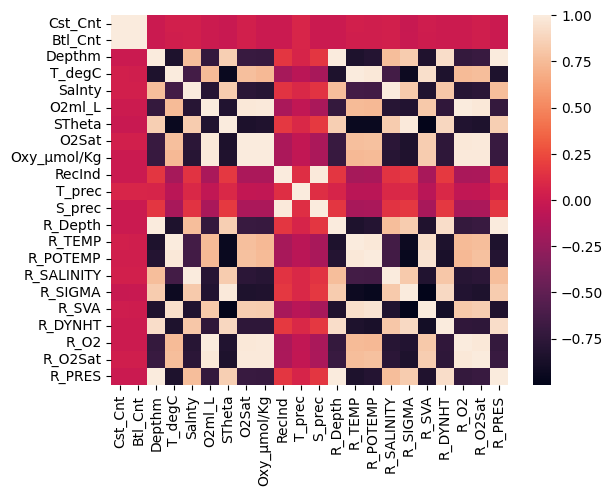

In [13]:
import seaborn as sns

sns.heatmap(data=df_corr)

In the heatmap I can see that the target and 2 more variable have too much correlation so we can fall into leakage. I'll remove both.

In [14]:
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = XGBRegressor(random_state=0, 
                     n_estimators=1000, 
                     learning_rate=0.05,
                     early_stopping_rounds=10)

drop_columns = ['T_degC' ,'R_TEMP', 'R_POTEMP']

for i in imputes:
    df_imputado = pd.DataFrame(i.fit_transform(df_num), 
                               columns=df_num.columns)
    X = df_imputado.drop(columns=drop_columns, axis=1)
    y = df_imputado.T_degC
    # 1) Split train and temp
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                       train_size=0.6, 
                                                       random_state=0,
                                                       shuffle=True)

    # 2) Split temp in valid and test
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, 
                                                        train_size=0.5, 
                                                        random_state=0,
                                                       shuffle=True)
    model.fit(X_train, y_train,
             eval_set=[(X_valid, y_valid)],
             verbose=False)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    

    print(f'Imputer {i.strategy}, MAE: {mae:.3f}, R²: {r2:.3f}, RMSE: {rmse:.3f}')

Imputer mean, MAE: 0.084, R²: 0.997, RMSE: 0.229
Imputer median, MAE: 0.092, R²: 0.994, RMSE: 0.292
Imputer constant, MAE: 0.085, R²: 0.996, RMSE: 0.255
Imputer most_frequent, MAE: 0.115, R²: 0.989, RMSE: 0.422


The best imputation strategy is with the mean, so we have the best scores

In [15]:
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy='mean')

dummy.fit(X_train, y_train)
preds = dummy.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
r2 = r2_score(y_valid, preds)
rsme = np.sqrt(mean_squared_error(y_valid, preds))

print(f'MAE: {mae:.3f}, R2: {r2:.3f}, RSME: {rsme:.3f}')


MAE: 3.437, R2: -0.001, RSME: 4.025


I just execute this model to see how a dummy model would perform

In [16]:
null_percent = df_num.isna().mean()*100
cols_na = null_percent[null_percent > 20].index.tolist() 
# for the final model I'm just taking columns with less than 20% of NaN values
drop_columns = ['T_degC' ,'R_TEMP', 'R_POTEMP']
cols_to_drop =  cols_na + drop_columns
df_rf = df_num.drop(columns=cols_to_drop, axis=1)
df_col_rf = df_rf.columns
df_col_rf

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'Salnty', 'STheta', 'RecInd', 'T_prec',
       'S_prec', 'P_qual', 'Chlqua', 'Phaqua', 'SiO3qu', 'NO2q', 'NO3q',
       'NH3q', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_SALINITY',
       'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [17]:
X = df_num.loc[:, df_col_rf]
y = df_num['T_degC'].fillna(df_num['T_degC'].mean())
#y.info()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


def RandomForest(X, y, df_col_rf):
    # 1) Separar train y temp
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                       train_size=0.6, 
                                                       random_state=0,
                                                       shuffle=True)

    # 2) Separar temp en valid y test
    X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, 
                                                        train_size=0.5, 
                                                        random_state=0,
                                                       shuffle=True)
    numerical_transformer = SimpleImputer(strategy='mean')

    preprocessor = ColumnTransformer(
        transformers=[
            ('impute', numerical_transformer, df_col_rf)
        ]
    )
    
    param_grid={
        'model__n_estimators':[100, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split':[2, 5, 10],
        'model__min_samples_leaf':[1, 2, 4],
        'model__max_features':[1.0, 'sqrt']
    }

    scoring = ['neg_mean_absolute_error', 'r2', 'neg_root_mean_squared_error']
    
    rf = RandomForestRegressor(random_state=0)
    
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', rf)
    ])

    grid_search = GridSearchCV(estimator=my_pipeline, param_grid=param_grid,
                              cv=5, scoring=scoring, refit='r2', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)

    preds_valid = grid_search.predict(X_valid)

    print(f'Mejores Parametros:', grid_search.best_params_)
    print('R2 en validación:', r2_score(y_valid, preds_valid))
    print('MAE en validación:', mean_absolute_error(y_valid, preds_valid))

    preds_test = grid_search.predict(X_test)
    print('R2 en test:', r2_score(y_test, preds_test))
    print('MAE en test:', mean_absolute_error(y_test, preds_test))

In [19]:
RandomForest(X, y, df_col_rf)

Mejores Parametros: {'model__max_depth': 20, 'model__max_features': 1.0, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
R2 en validación: 0.9972203006394347
MAE en validación: 0.0839092334993236
R2 en test: 0.9951259921422079
MAE en test: 0.08362499264993904
